Author: Shan Qu, Delft University of Technology

First created: 3 April 2021; last modified: 7 April 2021

Product: explore and prepare the credit data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', 30)


## 1. Explore the data (German credit dataset)
Data source: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)


###1.1 Display info of the data


In [2]:
# add list of names as column names for the dataframe, based on the description of the data
ls_names = ['checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount', 
         'savings_account', 'employment_length', 'installment_rate', 'status_sex', 'other_debtors', 
         'residence_length', 'property', 'age', 'installment_plan', 'housing', 
         'existing_credits', 'job', 'liable_people', 'telephone', 'foreign_worker', 'default']
df_data = pd.read_csv('Data/german.data', names=ls_names, delimiter=' ')
print(df_data.info())
N_data = len(df_data)
print(df_data.columns)
df_data.head()

print('7 numerical variables and 13 categorical variables')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checking_account   1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   credit_amount      1000 non-null   int64 
 5   savings_account    1000 non-null   object
 6   employment_length  1000 non-null   object
 7   installment_rate   1000 non-null   int64 
 8   status_sex         1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residence_length   1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  installment_plan   1000 non-null   object
 14  housing            1000 non-null   object
 15  existing_credits   1000 non-null   int64 
 16  job                1000 non-null   object
 

In [3]:
# 'default' column is detected as numerical
# 1 - good, 2 - bad
df_data['default'] = df_data['default'].replace({1: 'good', 2: 'bad'})
print(df_data.info())
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checking_account   1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   credit_amount      1000 non-null   int64 
 5   savings_account    1000 non-null   object
 6   employment_length  1000 non-null   object
 7   installment_rate   1000 non-null   int64 
 8   status_sex         1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residence_length   1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  installment_plan   1000 non-null   object
 14  housing            1000 non-null   object
 15  existing_credits   1000 non-null   int64 
 16  job                1000 non-null   object
 

,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_length,installment_rate,status_sex,other_debtors,residence_length,property,age,installment_plan,housing,existing_credits,job,liable_people,telephone,foreign_worker,default
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,bad


###1.2 Replace the missing data

In [4]:
# Print columns with null
print(df_data.columns[df_data.isnull().any()])
print('There is no null')

#print(df_data['Saving accounts'].isnull().sum())
#print(df_data[df_data['Saving accounts'].isnull()].head())

# replace null with 'Other' for categorical variables
#df_data['Saving accounts'].fillna('Other', inplace=True)
#print(df_data.columns[df_data.isnull().any()])

Index([], dtype='object')
There is no null


### 1.3 Change the values of categorical variables for analysis 

will change them back during encoding

In [5]:
# Change the labels of categorical variables for analysis (will change them back when encoding)

# 'checking_account': 'A11': '[, 0)', 'A12': '[0, 200)', 'A13': '[200, )', 'A14': 'no'
df_data['checking_account'] = df_data['checking_account'].replace(
    {'A11': '[, 0)', 'A12': '[0, 200)', 'A13': '[200, )', 'A14': 'no'})

# 'credit_history': 'A30': 'no_credit', 'A31': 'all_paid', 'A32': 'exist_credit', 'A33': 'delay_past', 'A34': 'other'
df_data['credit_history'] = df_data['credit_history'].replace(
    {'A30': 'no_credit', 'A31': 'all_paid', 'A32': 'exist_credit', 'A33': 'delay_past', 'A34': 'other'})

# 'purpose': 'A40': 'car_new', 'A41': 'car_used', 'A42': 'furniture_equipment', 'A43': 'radio_tv', 'A44': 'appliances',
#            'A45': 'repairs', 'A46': 'education', 'A47': 'vacation', 'A48': 'retrain', 'A49': 'business', 'A410': 'others'
df_data['purpose'] = df_data['purpose'].replace(
    {'A40': 'car_new', 'A41': 'car_used', 'A42': 'furniture_equipment', 'A43': 'radio_tv', 'A44': 'appliances',
     'A45': 'repairs', 'A46': 'education', 'A47': 'vacation', 'A48': 'retrain', 'A49': 'business', 'A410': 'others'})

# 'savings_account': 'A61': '[, 100)', 'A62': '[100, 500)', 'A63': '[500, 1000)', 'A64': '[1000, )', 'A65': 'unknown'
df_data['savings_account'] = df_data['savings_account'].replace(
    {'A61': '[, 100)', 'A62': '[100, 500)', 'A63': '[500, 1000)', 'A64': '[1000, )', 'A65': 'unknown'})

# 'employment_length': 'A71': 'unemployed', 'A72': '[, 1)', 'A73': '[1, 4)', 'A74': '[4, 7)', 'A75': '[7, )'
df_data['employment_length'] = df_data['employment_length'].replace(
    {'A71': 'unemployed', 'A72': '[, 1)', 'A73': '[1, 4)', 'A74': '[4, 7)', 'A75': '[7, )'})

# 'status_sex': 'A91': 'male_divorce', 'A92': 'female_divorce_married', 'A93': 'male_single', 'A94': 'male_married', 'A95': 'female_single'
df_data['status_sex'] = df_data['status_sex'].replace(
    {'A91': 'male_divorce', 'A92': 'female_divorce_married', 'A93': 'male_single', 'A94': 'male_married', 'A95': 'female_single'})

# 'other_debtors': 'A101': 'no', 'A102': 'coapplicant', 'A103': 'guarantor'
df_data['other_debtors'] = df_data['other_debtors'].replace(
    {'A101': 'no', 'A102': 'coapplicant', 'A103': 'guarantor'})

# 'property': 'A121': 'real_estate', 'A122': 'insurance', 'A123': 'car', 'A124': 'unknown'
df_data['property'] = df_data['property'].replace(
    {'A121': 'real_estate', 'A122': 'insurance', 'A123': 'car', 'A124': 'unknown'})

# 'installment_plan': 'A141': 'bank', 'A142': 'stores', 'A143': 'no'
df_data['installment_plan'] = df_data['installment_plan'].replace(
    {'A141': 'bank', 'A142': 'stores', 'A143': 'no'})

# 'housing': 'A151': 'rent', 'A152': 'own', 'A153': 'free'
df_data['housing'] = df_data['housing'].replace(
    {'A151': 'rent', 'A152': 'own', 'A153': 'free'})

# 'job': 'A171': 'unskilled_nonresident', 'A172': 'unskilled_resident', 'A173': 'skilled', 'A174': 'highly_skilled'
df_data['job'] = df_data['job'].replace(
    {'A171': 'unskilled_nonresident', 'A172': 'unskilled_resident', 'A173': 'skilled', 'A174': 'highly_skilled'})

# 'telephone': 'A191': 'no', 'A192': 'registered'
df_data['telephone'] = df_data['telephone'].replace(
    {'A191': 'no', 'A192': 'registered'})

# 'foreign_worker': 'A201': 'yes', 'A202': 'no'
df_data['foreign_worker'] = df_data['foreign_worker'].replace(
    {'A201': 'yes', 'A202': 'no'})

df_data.head()

,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_length,installment_rate,status_sex,other_debtors,residence_length,property,age,installment_plan,housing,existing_credits,job,liable_people,telephone,foreign_worker,default
0,"[, 0)",6,other,radio_tv,1169,unknown,"[7, )",4,male_single,no,4,real_estate,67,no,own,2,skilled,1,registered,yes,good
1,"[0, 200)",48,exist_credit,radio_tv,5951,"[, 100)","[1, 4)",2,female_divorce_married,no,2,real_estate,22,no,own,1,skilled,1,no,yes,bad
2,no,12,other,education,2096,"[, 100)","[4, 7)",2,male_single,no,3,real_estate,49,no,own,1,unskilled_resident,2,no,yes,good
3,"[, 0)",42,exist_credit,furniture_equipment,7882,"[, 100)","[4, 7)",2,male_single,guarantor,4,insurance,45,no,free,1,skilled,2,no,yes,good
4,"[, 0)",24,delay_past,car_new,4870,"[, 100)","[1, 4)",3,male_single,no,4,unknown,53,no,free,2,skilled,2,no,yes,bad


### 1.4 Find outliers

The numerical variables can have outliers:

'duration', 'credit_amount', 'installment_rate', 'residence_length', 'age','existing_credits', 'liable_people'

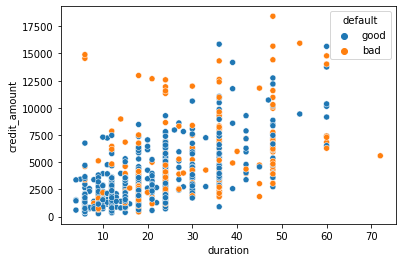

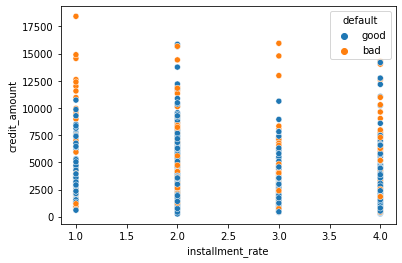

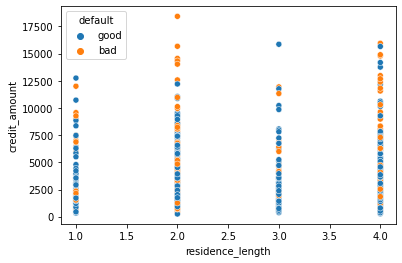

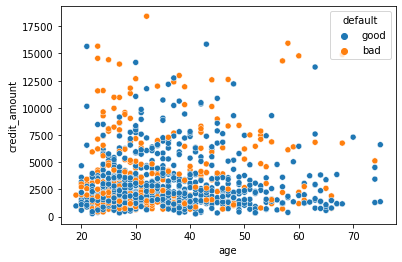

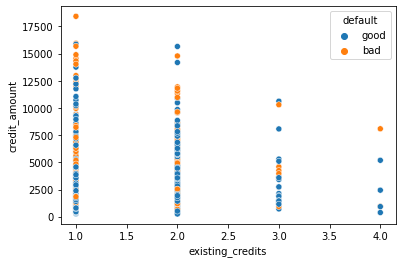

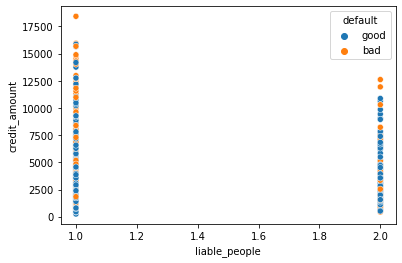

There is no obvious outliers


In [6]:
# Create the scatter plot for these variables with credit amount
sns.scatterplot(x='duration', y='credit_amount', data=df_data, hue='default').set(xlabel='duration', ylabel='credit_amount')
plt.show()

sns.scatterplot(x='installment_rate', y='credit_amount', data=df_data, hue='default').set(xlabel='installment_rate', ylabel='credit_amount')
plt.show()

sns.scatterplot(x='residence_length', y='credit_amount', data=df_data, hue='default').set(xlabel='residence_length', ylabel='credit_amount')
plt.show()

sns.scatterplot(x='age', y='credit_amount', data=df_data, hue='default').set(xlabel='age', ylabel='credit_amount')
plt.show()

sns.scatterplot(x='existing_credits', y='credit_amount', data=df_data, hue='default').set(xlabel='existing_credits', ylabel='credit_amount')
plt.show()

sns.scatterplot(x='liable_people', y='credit_amount', data=df_data, hue='default').set(xlabel='liable_people', ylabel='credit_amount')
plt.show()

print("There is no obvious outliers")

### 1.5 Observe the data more

**univariate variables:**

numerical ones: distribution plot

categorical ones: histogram plot

**multivariate variables:**

numerical ones: violin plot grouped by Risk

categorical ones: histogram plot grouped by Risk


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


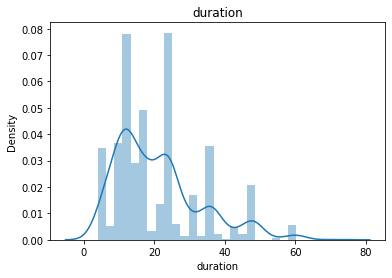

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


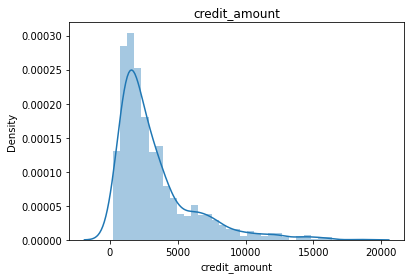

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


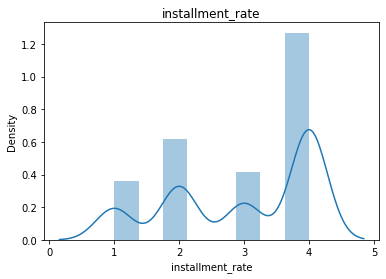

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


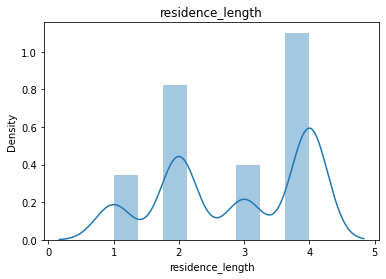

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


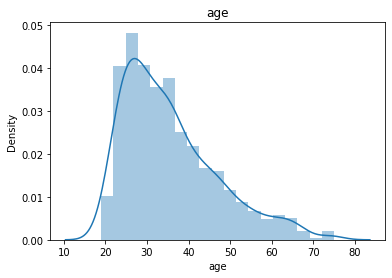

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


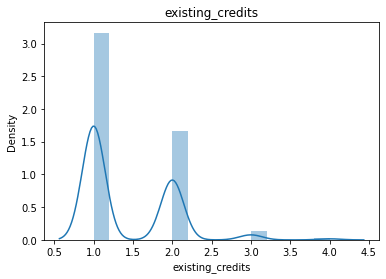

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


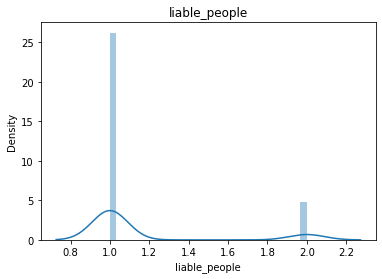

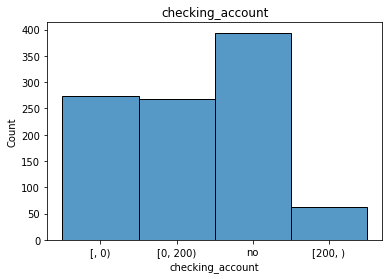

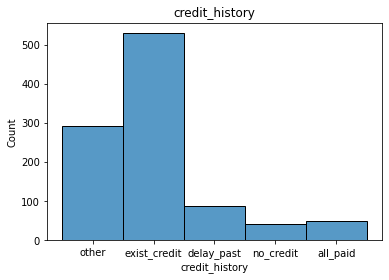

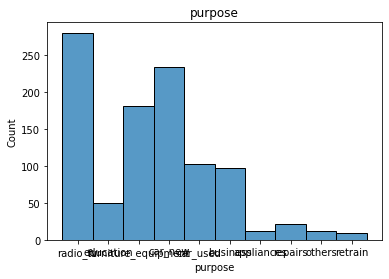

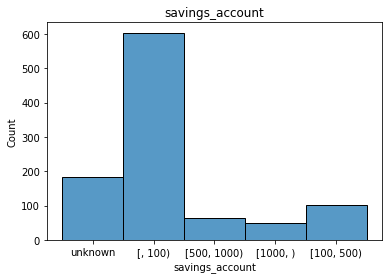

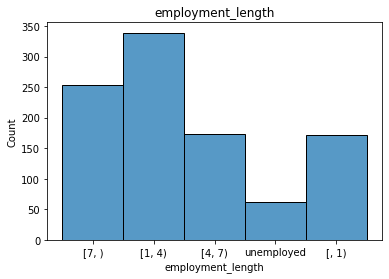

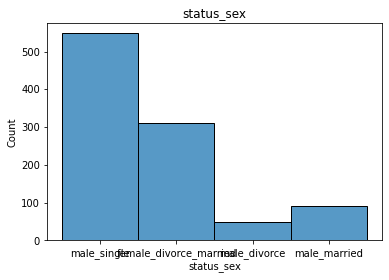

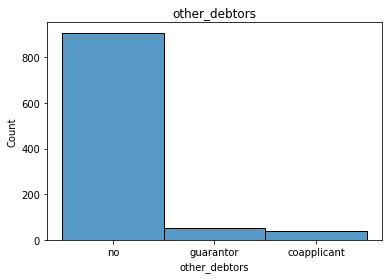

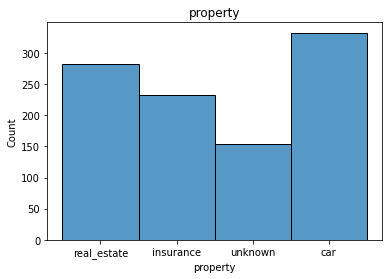

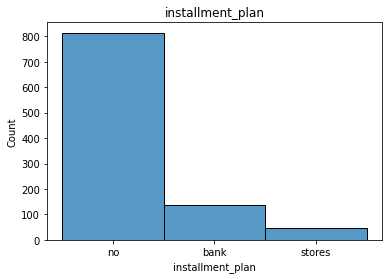

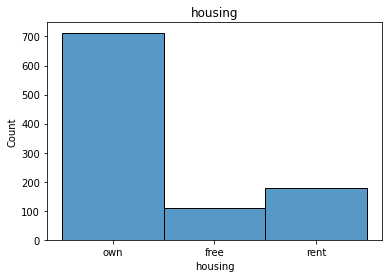

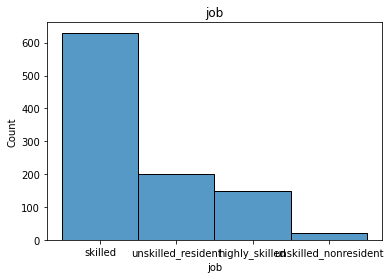

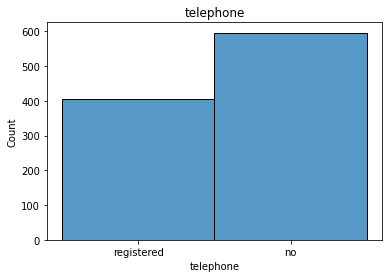

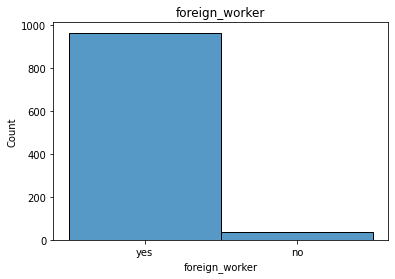

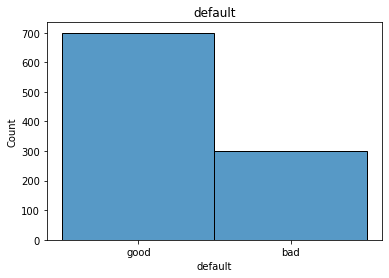

In [7]:
df_data.describe()
# Create two data sets for numerical and categorical data
df_data_num = df_data.select_dtypes(exclude=['object'])
df_data_cat = df_data.select_dtypes(include=['object'])

# univariate plot
for col in df_data_num:
  sns.distplot(df_data_num[col]).set_title(col)
  plt.show()

for col in df_data_cat:
  sns.histplot(df_data_cat[col]).set_title(col)
  plt.show()

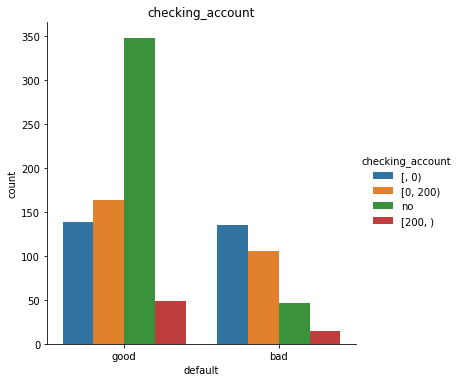

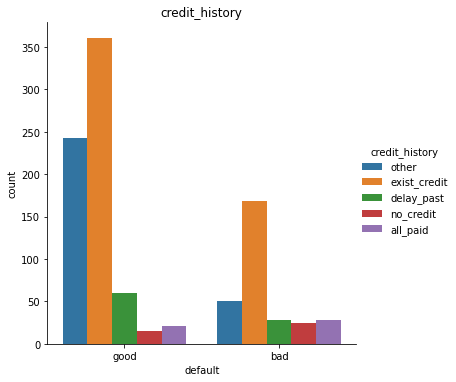

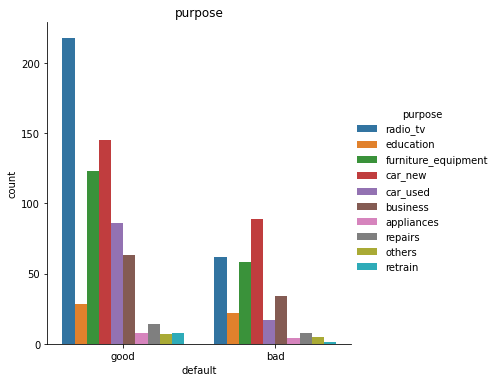

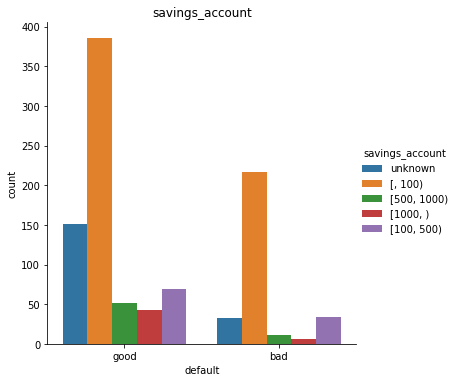

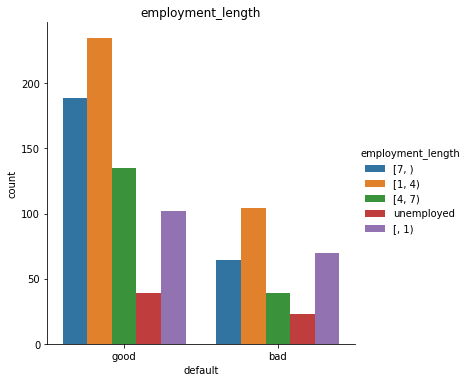

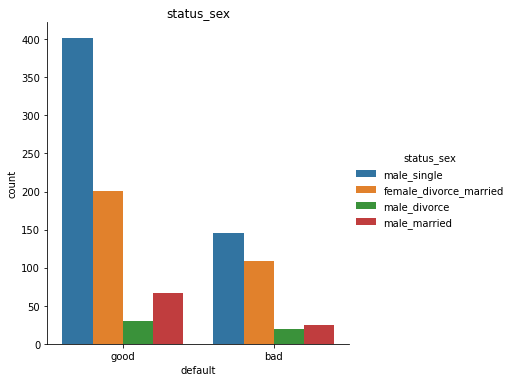

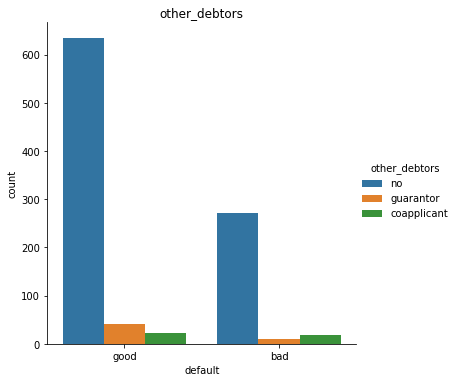

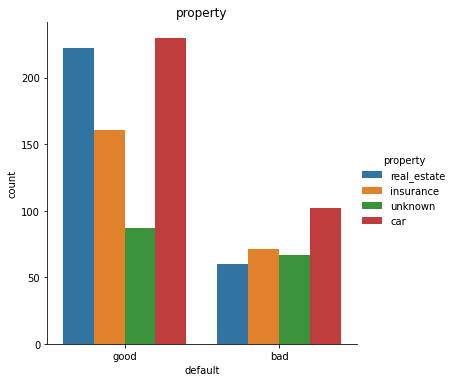

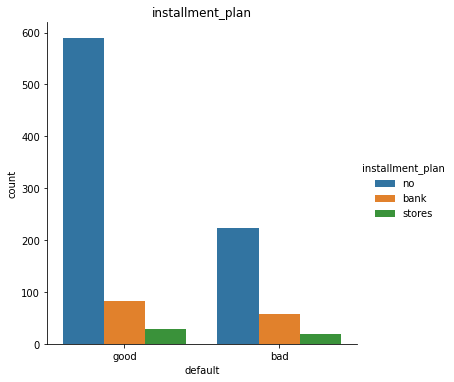

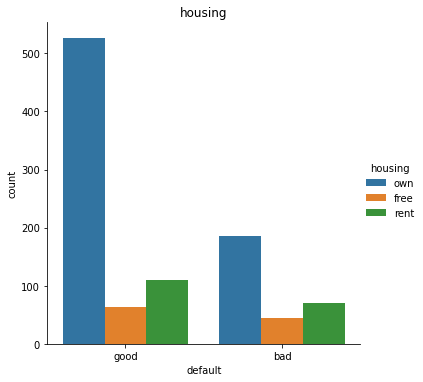

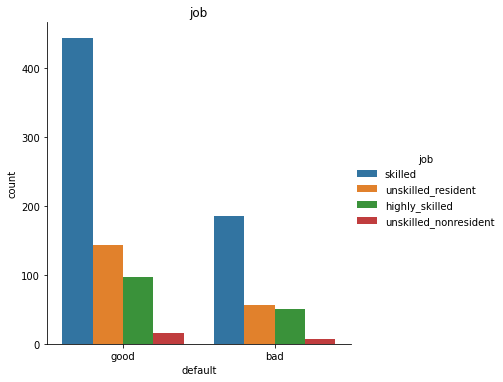

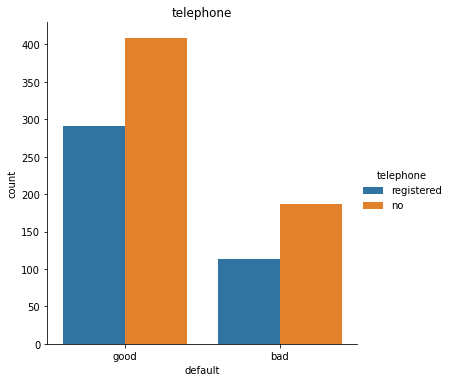

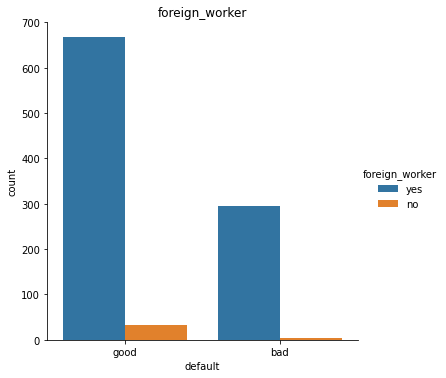

In [8]:
# multivariate plot
#'checking_account', 'credit_history', 'purpose', 'savings_account', 'employment_length', 
#'status_sex', 'other_debtors', 'property', 'installment_plan', 'housing', 
# 'job', 'telephone', 'foreign_worker'
sns.catplot(x='default', hue='checking_account', data=df_data, kind='count').set(title='checking_account')
plt.show()

sns.catplot(x='default', hue='credit_history', data=df_data, kind='count').set(title='credit_history')
plt.show()

sns.catplot(x='default', hue='purpose', data=df_data, kind='count').set(title='purpose')
plt.show()

sns.catplot(x='default', hue='savings_account', data=df_data, kind='count').set(title='savings_account')
plt.show()

sns.catplot(x='default', hue='employment_length', data=df_data, kind='count').set(title='employment_length')
plt.show()

sns.catplot(x='default', hue='status_sex', data=df_data, kind='count').set(title='status_sex')
plt.show()

sns.catplot(x='default', hue='other_debtors', data=df_data, kind='count').set(title='other_debtors')
plt.show()

sns.catplot(x='default', hue='property', data=df_data, kind='count').set(title='property')
plt.show()

sns.catplot(x='default', hue='installment_plan', data=df_data, kind='count').set(title='installment_plan')
plt.show()

sns.catplot(x='default', hue='housing', data=df_data, kind='count').set(title='housing')
plt.show()

sns.catplot(x='default', hue='job', data=df_data, kind='count').set(title='job')
plt.show()

sns.catplot(x='default', hue='telephone', data=df_data, kind='count').set(title='telephone')
plt.show()

sns.catplot(x='default', hue='foreign_worker', data=df_data, kind='count').set(title='foreign_worker')
plt.show()



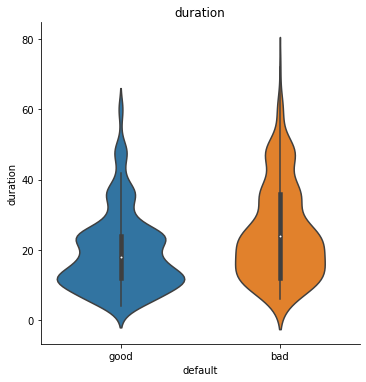

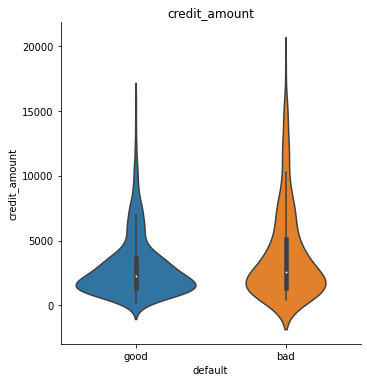

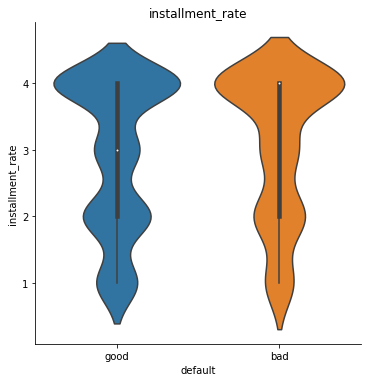

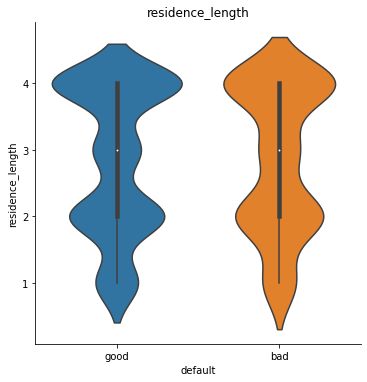

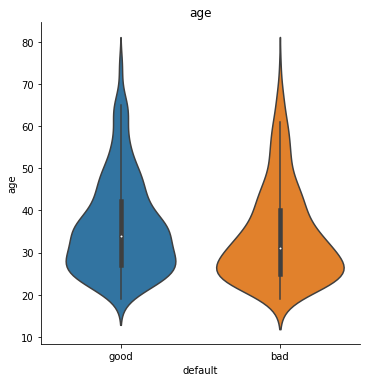

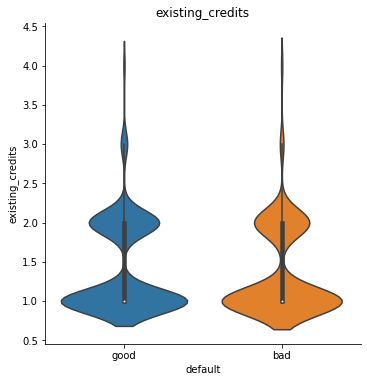

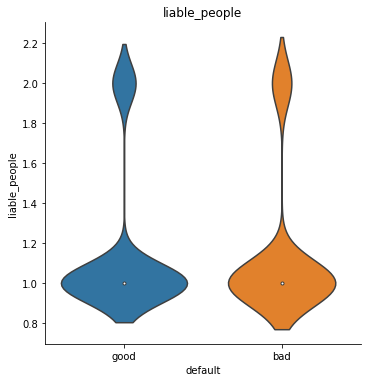

In [9]:
#'duration', 'credit_amount', 'installment_rate', 'residence_length', 'age','existing_credits', 'liable_people'

sns.catplot(x='default', y='duration', data=df_data, kind='violin').set(title='duration')
plt.show()

sns.catplot(x='default', y='credit_amount', data=df_data, kind='violin').set(title='credit_amount')
plt.show()

sns.catplot(x='default', y='installment_rate', data=df_data, kind='violin').set(title='installment_rate')
plt.show()

sns.catplot(x='default', y='residence_length', data=df_data, kind='violin').set(title='residence_length')
plt.show()

sns.catplot(x='default', y='age', data=df_data, kind='violin').set(title='age')
plt.show()

sns.catplot(x='default', y='existing_credits', data=df_data, kind='violin').set(title='existing_credits')
plt.show()

sns.catplot(x='default', y='liable_people', data=df_data, kind='violin').set(title='liable_people')
plt.show()


### 1.6 Write the data out for the next step --- data_preprocessing

In [10]:
df_data.to_csv('df_data.csv')